In [2]:
%matplotlib inline
#%matplotlib widget

In [3]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
from ipywidgets import HBox, Textarea, interact

In [4]:
expSumFileName ='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\two_circles_exp\\two_circles_exp4.csv'
expSum = pd.read_csv(expSumFileName,index_col=0)
#expSum=expSum[expSum.index>32]
expSum=expSum[(expSum['date']==20231212)]
thresh_diameter={7:40,12:72,18:100,28:151,32:181}
diameters=[12,18,28]
fps=25
#bottypes=['fronter','aligner']
bottypes=['aligner']
time_resultss=[]
for bottype in bottypes:
    print(bottype)
    relevant_data=expSum[(expSum['bottype']==bottype)]
    time_persentage=[]
    for diameter in diameters:
        print(diameter)
        time_results=[]
        
        for index,row in relevant_data.iterrows():
            file_name=row.path
            video = cv2.VideoCapture(file_name)
            frameCount = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
            distance_file_name=file_name+'_{}cm_distances.csv'.format(diameter)
            distances=pd.read_csv(distance_file_name,index_col=0)
            close_threshold=(thresh_diameter[diameter]+50)**2
            too_close_thresh=thresh_diameter[diameter]**2
            cond = (distances.distance_sq<=close_threshold)&(distances.distance_sq>too_close_thresh)
            dfC = distances[cond]
            kissing_persentage=len(dfC)/frameCount*100
            kissing_time=len(dfC)/fps
            time_results.append(kissing_time)
            time_persentage.append(kissing_persentage)
        
        time_resultss.append(time_results)     
        
    
        print('kissing persetages:')
        print(time_persentage)
        time_np=np.array(time_results)
        print('avg')
        print(np.mean(time_np))
        print('total kissing time:')
        print(time_results)
    
    

aligner
12
kissing persetages:
[0.0, 1.2855517633674631, 6.801700425106276, 6.0376134889753565, 2.292986159981234, 0.0, 2.0336156017449323]
avg
16.874285714285715
total kissing time:
[0.0, 9.04, 43.52, 37.24, 15.64, 0.0, 12.68]
18
kissing persetages:
[0.0, 1.2855517633674631, 6.801700425106276, 6.0376134889753565, 2.292986159981234, 0.0, 2.0336156017449323, 4.715416028586014, 4.050056882821388, 2.1567891972993247, 4.396887159533074, 35.87262491203378, 0.8327165062916358, 4.086476777007954]
avg
53.50285714285714
total kissing time:
[29.56, 28.48, 13.8, 27.12, 244.68, 5.4, 25.48]
28
kissing persetages:
[0.0, 1.2855517633674631, 6.801700425106276, 6.0376134889753565, 2.292986159981234, 0.0, 2.0336156017449323, 4.715416028586014, 4.050056882821388, 2.1567891972993247, 4.396887159533074, 35.87262491203378, 0.8327165062916358, 4.086476777007954, 78.74553343542624, 3.1399317406143346, 39.803700925231304, 61.7769130998703, 2.1463757916959887, 79.87293362941031, 67.00025660764692]
avg
300.25714

In [10]:
expSumFileName ='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\two_circles_exp\\two_circles_exp5.csv'
expSum = pd.read_csv(expSumFileName,index_col=0)
#expSum=expSum[expSum.index>32]
#expSum=expSum[((expSum['date']==20231212)|(expSum['date']==20231130))]
#range_1=range()
expSum=expSum.iloc[[36,37,41,42,45,46,47,48]]
#expSum=expSum.iloc[[35]]
#thresh_diameter={7:40,12:72,18:100,28:151,32:181}
thresh_diameter={7:40,12:62,18:95,28:145,32:181}
#thresh_diameter={7:30,12:58,18:80,28:136,32:151}
diameters=[12,18,28]
fps=25
bottypes=['fronter','aligner']
#bottypes=['aligner']
time_resultss=[]
for bottype in bottypes:
    print(bottype)
    relevant_data=expSum[(expSum['bottype']==bottype)]
    for index,row in relevant_data.iterrows():
        first_diameter=row['FirstDiameterLocatingFile']
        second_diameter=row['SecondDiameterLocatingFile']
        third_diameter=row['ThirdDiameterLocatingFile']
        diameters_files=[first_diameter,second_diameter,third_diameter]
        file_name=row.path
        video = cv2.VideoCapture(file_name)
        frameCount = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
        time_results=[]
        time_persentage=[]
        frame_nums=[]
        for i in [0,1,2]:
            print(diameters[i])
            #distance_file_name=file_name+'_{}cm_distances.csv'.format(diameter)
            distance_file_name=diameters_files[i]+'_distances.csv'
            distances=pd.read_csv(distance_file_name,index_col=0)
            close_threshold=(thresh_diameter[diameters[i]]+30)**2
            too_close_thresh=thresh_diameter[diameters[i]]**2
            cond = (distances.distance_sq<=close_threshold)&(distances.distance_sq>too_close_thresh)
            dfC = distances[cond]
            kissing_persentage=len(dfC)/frameCount*100
            frame_num=len(dfC)
            kissing_time=len(dfC)/fps
            time_results.append(kissing_time)
            time_persentage.append(kissing_persentage)
            frame_nums.append(frame_num)
        total_frames=np.ones(3)*frameCount
        data=pd.DataFrame(data={'diameter[cm]':diameters,'absolute kissing time[sec]':time_results,
                                'persentage kissing time [%]':time_persentage,'frame_num':frame_nums,
                                'total frames':total_frames})
        data.to_csv(file_name+'_test_kissing_time_results.csv')
        print('saved in :'+file_name+'_test_kissing_time_results.csv')
        
    
        #print('kissing persetages:')
        #print(time_persentage)
        #time_np=np.array(time_results)
        #print('avg')
        #print(np.mean(time_np))
        #print('total kissing time:')
        #print(time_results)
    
    

fronter
12
18
28
saved in :D:\Eden\new_exp_test_15_11_23\7_2_24\C0685.MP4_test_kissing_time_results.csv
12
18
28
saved in :D:\Eden\new_exp_test_15_11_23\7_2_24\C0686.MP4_test_kissing_time_results.csv
12
18
28
saved in :D:\Eden\new_exp_test_15_11_23\7_2_24\C0687.MP4_test_kissing_time_results.csv
12
18
28
saved in :D:\Eden\new_exp_test_15_11_23\7_2_24\C0691.MP4_test_kissing_time_results.csv
aligner
12
18
28
saved in :D:\Eden\new_exp_test_15_11_23\7_2_24\C0672.MP4_test_kissing_time_results.csv
12
18
28
saved in :D:\Eden\new_exp_test_15_11_23\7_2_24\C0674.MP4_test_kissing_time_results.csv
12
18
28
saved in :D:\Eden\new_exp_test_15_11_23\7_2_24\C0678.MP4_test_kissing_time_results.csv
12
18
28
saved in :D:\Eden\new_exp_test_15_11_23\7_2_24\C0679.MP4_test_kissing_time_results.csv


In [38]:
expSumFileName ='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\two_circles_exp\\two_circles_exp5.csv'
expSum = pd.read_csv(expSumFileName,index_col=0)
#expSum=expSum[expSum.index>32]
#expSum=expSum[((expSum['date']==20231212)|(expSum['date']==20231130))]
#range_1=range()
expSum=expSum.iloc[[36]]
thresh_diameter={7:40,12:62,18:95,28:145,32:181}
relevant_data=expSum[(expSum['bottype']=='aligner')]
first_diameter=row['FirstDiameterLocatingFile']
second_diameter=row['SecondDiameterLocatingFile']
third_diameter=row['ThirdDiameterLocatingFile']
diameters_files=[first_diameter,second_diameter,third_diameter]
file_name=row.path
video = cv2.VideoCapture(file_name)
frameCount = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
distance_file_name=diameters_files[0] + '_distances.csv'
distances=pd.read_csv(distance_file_name,index_col=0)

distance_file_name=diameters_files[1] + '_distances.csv'
distances1=pd.read_csv(distance_file_name,index_col=0)

distance_file_name=diameters_files[2] + '_distances.csv'
distances2=pd.read_csv(distance_file_name,index_col=0)

close_threshold=(thresh_diameter[diameters[0]]+30)**2

too_close_thresh=thresh_diameter[diameters[0]]**2
cond = (distances.distance_sq<=close_threshold)&(distances.distance_sq>too_close_thresh)
cond = (distances.distance_sq<=close_threshold)
dfC = distances[cond]

kissing_persentage=len(dfC)/frameCount*100
frame_num=len(dfC)
kissing_time=len(dfC)/fps
print('kissing_persentage:{}'.format(kissing_persentage))
print('kissing_time:{}'.format(kissing_time))
print('frame_num:{}'.format(frame_num))


kissing_persentage:1.2097812097812097
kissing_time:7.52
frame_num:188


In [44]:
distance_file_name=diameters_files[1] + '_distances.csv'
distance_file_name

'D:\\Eden\\new_exp_test_15_11_23\\7_2_24\\C0679.MP4_locatedPillarFull20240313_18cm_10_frames.csv_distances.csv'

In [46]:
distances

,frame,distance_sq
0,1.0,240.097845
1,2.0,321.798895
2,3.0,301.717718
3,4.0,240.097845
4,5.0,240.078436
...,...,...
15523,15536.0,480154.239935
15524,15537.0,479270.139837
15525,15538.0,478313.600287
15526,15539.0,472211.320379


In [45]:
distances1

,frame,distance_sq
0,1.0,240.097845
1,2.0,321.798895
2,3.0,301.717718
3,4.0,240.097845
4,5.0,240.078436
...,...,...
15523,15536.0,480154.239935
15524,15537.0,479270.139837
15525,15538.0,478313.600287
15526,15539.0,472211.320379


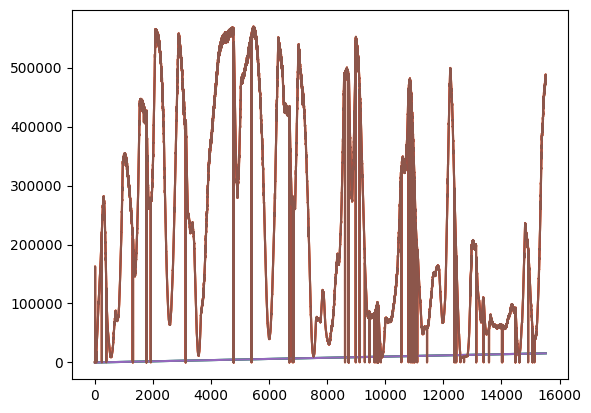

In [39]:
plt.plot(distances)

plt.plot(distances2)


(8000.0, 15000.0, -100.0, 10000.0)

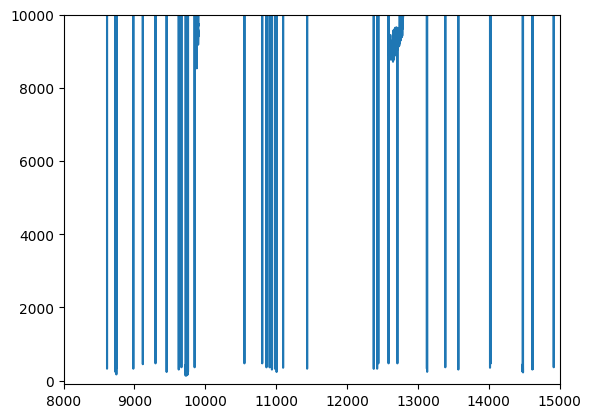

In [35]:
plt.plot(distances[distances.frame>8000]['distance_sq'])
plt.axis([8000,15000,-100,10000])

In [36]:
dfC

,frame,distance_sq
0,1.0,240.097845
1,2.0,321.798895
2,3.0,301.717718
3,4.0,240.097845
4,5.0,240.078436
...,...,...
14622,14635.0,325.577704
14917,14930.0,364.397650
15070,15083.0,325.837713
15076,15089.0,471.517523


In [31]:
too_close_thresh

3844

In [30]:
close_threshold

8464

fronter
aligner


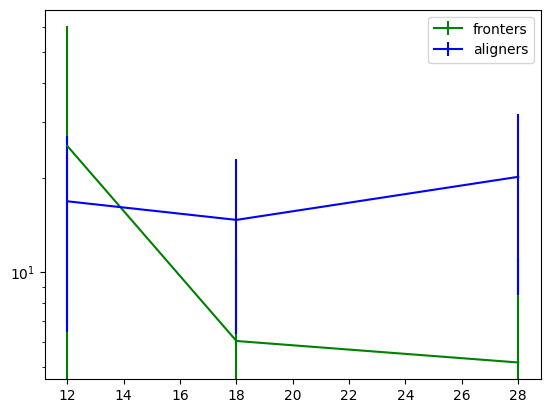

In [17]:
expSumFileName ='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\two_circles_exp\\two_circles_exp5.csv'
expSum = pd.read_csv(expSumFileName,index_col=0)
expSum=expSum.iloc[range(36,50)]
bottypes=['fronter','aligner']
results=pd.DataFrame({'diameter[cm]':[],'avrage kissing time':[],'SE kissing time':[],'avrage percentage':[],'SE percentage':[]})
raw_results=[]
for bottype in bottypes:
    print(bottype)
    relevant_data=expSum[(expSum['bottype']==bottype)]
    
    for diameter in diameters:
        row_line=pd.DataFrame()
        collect_time=[]
        collect_percentage=[]
        row_line['diameter[cm]']=np.array([diameter])
        for index,row in relevant_data.iterrows():
            file_name=row.path
            data=pd.read_csv(file_name+'_test_kissing_time_results.csv',index_col=0)
            data_line=data[(data['diameter[cm]']==diameter)]
            collect_time.append(data_line['absolute kissing time[sec]'].values[0])
            collect_percentage.append(data_line['persentage kissing time [%]'].values[0])
        raw_results.append(collect_time)
        np_collect_time=np.array(collect_time)
        row_line['avrage kissing time']=np.array([np.mean(np_collect_time)])
        row_line['SE kissing time']=np.array([np.std(np_collect_time)])
        np_collect_percentage=np.array(collect_percentage)
        row_line['avrage percentage']=np.array([np.mean(np_collect_percentage)])
        row_line['SE percentage']=np.array([np.std(np_collect_percentage)])
        results = pd.concat([results,row_line],ignore_index=True)
results['bottype']=[bottypes[0]]*len(diameters)+[bottypes[1]]*len(diameters)
results_fronters=results[(results['bottype']=='fronter')]
results_aligners=results[(results['bottype']=='aligner')]
plt.errorbar(diameters,results_fronters['avrage kissing time'],results_fronters['SE kissing time'],label="fronters",c='green')
plt.errorbar(diameters,results_aligners['avrage kissing time'],results_aligners['SE kissing time'],label="aligners",c='blue')
plt.yscale('log')
plt.legend(loc="upper right")
plt.savefig('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\two_circles_exp\\time_persentage_vs_diameter.png')

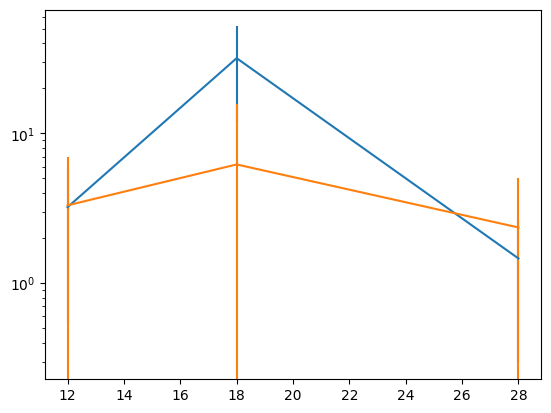

In [12]:
plt.errorbar(diameters,results_fronters['avrage percentage'],results_fronters['SE percentage'])
plt.errorbar(diameters,results_aligners['avrage percentage'],results_aligners['SE percentage'])
plt.yscale('log')

In [13]:
def l2n(x): return np.array(x)

In [14]:
raw_results

[[5.08, 26.12, 21.32, 48.0, 1.8],
 [66.12, 171.04, 182.64, 153.56, 464.84],
 [3.48, 9.64, 4.6, 22.96, 5.96],
 [7.76,
  79.56,
  8.52,
  0.0,
  3.68,
  37.8,
  0.0,
  9.04,
  43.48,
  37.12,
  15.72,
  0.0,
  12.68],
 [16.52,
  0.0,
  34.68,
  0.0,
  0.0,
  101.16,
  29.56,
  28.48,
  13.84,
  26.96,
  244.44,
  5.32,
  25.4],
 [25.24,
  0.0,
  26.48,
  0.0,
  0.0,
  61.04,
  0.0,
  22.08,
  17.24,
  10.6,
  9.36,
  1.44,
  20.08]]

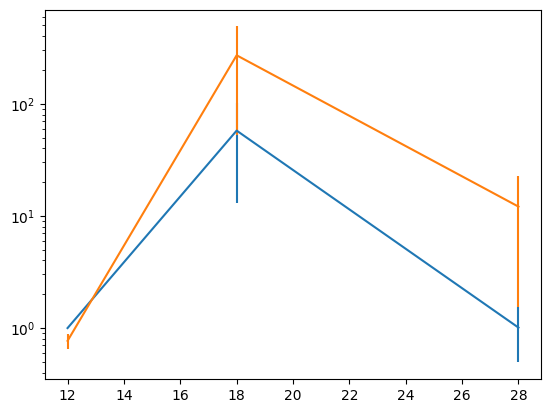

In [16]:
t0_fr = l2n(raw_results[0])+0.01

ratios_fr = []
ratiosSE_fr = []
for tt in raw_results[0:3]:
    ratios_fr.append((l2n(tt)/t0_fr).mean())
    ratiosSE_fr.append((l2n(tt)/t0_fr).std())

ratios_fr = l2n(ratios_fr)
ratiosSE_fr = l2n(ratiosSE_fr)
ratiosSE_fr /= len(t0_fr)**0.5
plt.errorbar([12,18,28],ratios_fr,ratiosSE_fr)

t0_al = l2n(raw_results[3])+0.01

ratios_al = []
ratiosSE_al = []
for tt in raw_results[3:]:
    ratios_al.append((l2n(tt)/t0_al).mean())
    ratiosSE_al.append((l2n(tt)/t0_al).std())

ratios_al = l2n(ratios_al)
ratiosSE_al = l2n(ratiosSE_al)
ratiosSE_al /= len(t0_al)**0.5
plt.errorbar([12,18,28],ratios_al,ratiosSE_al)
plt.yscale('log')

In [19]:
distance_path='D:\\Eden\\new_exp_test_15_11_23\\30_11_23\\aligners'
video_file_name='C0640.MP4'
thresh_diameter={7:40,12:72,18:100,28:151,32:181}
fps=25
video = cv2.VideoCapture(distance_path+'\\'+video_file_name)
frameCount = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

distance_file_name=video_file_name+'_12cm_distances.csv'
distance_full_file_name=distance_path+'\\'+distance_file_name
distances=pd.read_csv(distance_full_file_name,index_col=0)
close_threshold=(72+50)**2
too_close_thresh=72**2

cond = (distances.distance_sq<=close_threshold)&(distances.distance_sq>too_close_thresh)
dfC = distances[cond]
kissing_persentage=len(dfC)/frameCount*100
kissing_time=len(dfC)/fps
print('kissing persetage:{}%'.format(kissing_persentage))
print('total kissing time:{} sec'.format(kissing_time))

kissing persetage:12.969483568075118%
total kissing time:79.56 sec


In [39]:
time_resultss

[[5.08, 26.12, 21.32, 48.0, 1.8],
 [66.12, 171.04, 182.64, 153.56, 464.84],
 [464.88, 83.0, 199.2, 174.28, 75.64],
 [7.76, 79.56, 8.52, 0.0, 3.68, 37.8],
 [16.52, 0.0, 34.68, 0.0, 0.0, 101.16],
 [0.0, 179.88, 93.4, 20.48, 0.0, 47.08]]

In [54]:
time_resultss

[]

In [55]:
def l2n(x): return np.array(x)

In [56]:

(l2n(time_resultss[1])/l2n(time_resultss[0])).mean()

IndexError: list index out of range

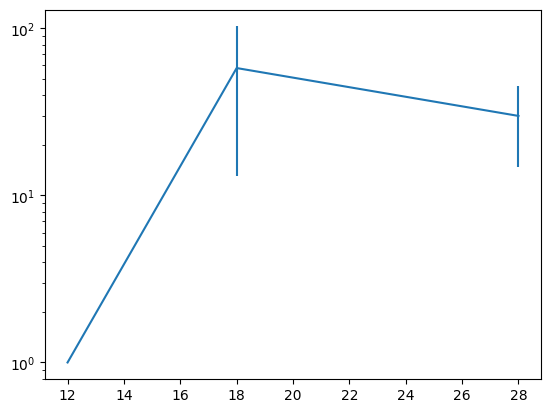

In [75]:
t0 = l2n(time_resultss[0])

ratios = []
ratiosSE = []
for tt in time_resultss[:3]:
    ratios.append((l2n(tt)/t0).mean())
    ratiosSE.append((l2n(tt)/t0).std())

ratios = l2n(ratios)
ratiosSE = l2n(ratiosSE)
ratiosSE /= len(t0)**0.5

plt.errorbar([12,18,28],ratios,ratiosSE)
plt.yscale('log')

<ErrorbarContainer object of 3 artists>

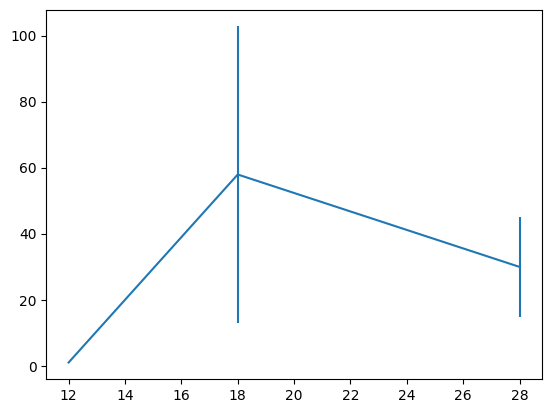

In [56]:
plt.errorbar([12,18,28],ratios,ratiosSE)

In [57]:
time_resultss

[[5.08, 26.12, 21.32, 48.0, 1.8],
 [66.12, 171.04, 182.64, 153.56, 464.84],
 [464.88, 83.0, 199.2, 174.28, 75.64],
 [7.76, 79.56, 8.52, 0.0, 3.68, 37.8],
 [16.52, 0.0, 34.68, 0.0, 0.0, 101.16],
 [0.0, 179.88, 93.4, 20.48, 0.0, 47.08]]

In [69]:
t0 = l2n(time_resultss[3])+0.01

ratios = []
ratiosSE = []
for tt in time_resultss[3:]:
    ratios.append((l2n(tt)/t0).mean())
    ratiosSE.append((l2n(tt)/t0).std())

ratios = l2n(ratios)
ratiosSE = l2n(ratiosSE)
ratiosSE /= len(t0)**0.5

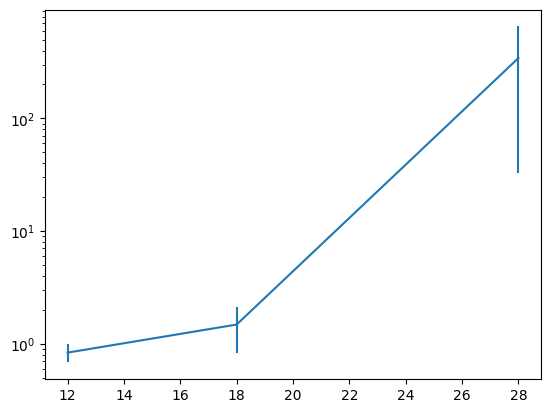

In [73]:
plt.errorbar([12,18,28],ratios,ratiosSE)
plt.yscale('log')